# Basic Operations

In this tutorial, we introduce the basic operations of climate datasets with `p2k`.

In [1]:
%load_ext autoreload
%autoreload 2

import p2k
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Generate random data and form a `ClimateField`

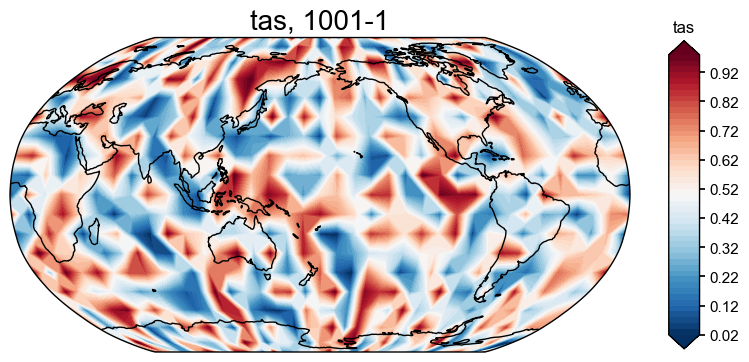

In [2]:
lat = np.arange(-90, 90.1, 10)
lon = np.arange(0, 360, 10)
time = np.arange(1001, 1002, 1)
data = np.random.rand(np.size(time), np.size(lat), np.size(lon))

fd = p2k.ClimateField().from_np(time, lat, lon, data)
fig, ax = fd.plot()

## Load test data to `ClimateDataset`

In [3]:
dirpath = '/Volumes/ExtraDrive/Data/GCM_sims/icesm_last_millennium_historical'

In [4]:
ds_tas = p2k.ClimateDataset().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
ds_pr = p2k.ClimateDataset().load_nc(os.path.join(dirpath, 'pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

## Extract the climate variables, which is saved as `ClimateField`

In [5]:
fd_tas = ds_tas.fields['tas']
fd_pr = ds_pr.fields['pr']

## Add two `ClimateField`s together and get a new `ClimateDataset`

In [7]:
ds_new = fd_tas + fd_pr
print(ds_new.fields)
del ds_new

{'tas': <p2k.climate.ClimateField object at 0x7ff8f11320d0>, 'pr': <p2k.climate.ClimateField object at 0x7ff9127ffdf0>}


## Add `ClimateField`s into an existing `ClimateDataset`

In [9]:
ds_new = ds_tas + ds_pr
print(ds_new.fields)
del ds_new

{'tas': <p2k.climate.ClimateField object at 0x7ff8f1132100>, 'pr': <p2k.climate.ClimateField object at 0x7ff9127ffdf0>}


In [10]:
ds_new = ds_tas + fd_pr
print(ds_new.fields)
del ds_new

{'tas': <p2k.climate.ClimateField object at 0x7ff8f1132520>, 'pr': <p2k.climate.ClimateField object at 0x7ff9127ffdf0>}


## Subtract `ClimateField`s from an existing `ClimateDataset`

In [11]:
ds_left = ds_tas + fd_pr - fd_pr
print(ds_left.fields)
del ds_left

{'tas': <p2k.climate.ClimateField object at 0x7ff8f1123940>}


In [12]:
ds_left = ds_tas + ds_pr - ds_pr
print(ds_left.fields)
del ds_left

{'tas': <p2k.climate.ClimateField object at 0x7ff8f1132a30>}


## Rename the variable name of a `ClimateField`

In [13]:
fd_tas.da

<xarray.DataArray 'tas' (time: 13872, lat: 96, lon: 144)>
array([[[239.94366, 240.63997, 239.81148, ..., 240.63205, 239.93301,
         239.81549],
        [240.29779, 240.17676, 240.11914, ..., 240.48819, 239.79788,
         240.41107],
        [240.68542, 240.5819 , 240.4833 , ..., 241.05894, 240.7717 ,
         240.82518],
        ...,
        [242.32529, 242.52913, 242.68231, ..., 241.58093, 241.85107,
         242.08711],
        [241.19426, 241.2809 , 241.33688, ..., 240.70262, 240.88503,
         241.04764],
        [239.4208 , 239.40431, 239.39276, ..., 239.37224, 239.40518,
         239.42734]],

       [[232.94406, 233.24043, 232.87372, ..., 233.23865, 232.94257,
         232.87657],
        [233.27615, 233.11609, 233.00085, ..., 233.69162, 233.17068,
         233.4281 ],
        [233.76181, 233.631  , 233.48026, ..., 234.46228, 234.10928,
         233.97743],
...
        [247.88301, 248.05453, 248.18173, ..., 247.29007, 247.4816 ,
         247.67708],
        [246.40453, 246.42937, 246.4229 , ..., 246.18436, 246.26157,
         246.33577],
        [245.39226, 245.37354, 245.3524 , ..., 245.42094, 245.4156 ,
         245.4068 ]],

       [[241.52779, 242.07362, 241.65805, ..., 242.0622 , 241.50624,
         241.70734],
        [241.99512, 241.93668, 241.55824, ..., 242.21977, 241.82991,
         241.96878],
        [242.70892, 242.65137, 242.3606 , ..., 242.7449 , 242.90726,
         242.37793],
        ...,
        [239.60776, 239.62485, 239.66199, ..., 239.19336, 239.31738,
         239.48283],
        [238.63135, 238.64125, 238.61551, ..., 238.44406, 238.51622,
         238.57962],
        [237.80908, 237.78514, 237.76077, ..., 237.82137, 237.82687,
         237.8265 ]]], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  Reference height temperature
    units:      K

In [14]:
fd_tas_new = fd_tas.rename('temperature')
print(fd_tas_new.vn)

temperature
